# **LIBRARY**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **LOAD DATA**

# **SPLITTING DATA**

# **AUGMENTASI DATA**

# **MODELING**

## **RESNET 18**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

class CustomResNet18(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet18, self).__init__()
        self.resnet = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)
        for param in list(self.resnet.parameters())[-10:]:
            param.requires_grad = True
        # for param in self.resnet.parameters():
        #     param.requires_grad = False
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.resnet(x)

from torchvision import transforms

transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(45),
        transforms.RandomAffine(degrees=0, shear=0.2, scale=(0.8, 1.2)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomAffine(degrees=0, shear=0.2, scale=(0.8, 1.2)),
        transforms.RandomVerticalFlip(),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/SKRIPSI/dataset_split/train', transform=transform['train'])
val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/SKRIPSI/dataset_split/val', transform=transform['val'])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomResNet18(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

def train_model(model, criterion, optimizer, num_epochs=25):
    train_loss_history = []  # Initialize list to store training loss per epoch
    val_loss_history = []    # Initialize list to store validation loss per epoch
    train_acc_history = []   # Initialize list to store training accuracy per epoch
    val_acc_history = []     # Initialize list to store validation accuracy per epoch

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += labels.size(0)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Store loss and accuracy per epoch
            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc)
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc)

    return train_loss_history, val_loss_history, train_acc_history, val_acc_history

# Train the model
train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_model(model, criterion, optimizer, num_epochs=30)




Mounted at /content/drive


Downloading: "https://github.com/pytorch/vision/zipball/v0.9.0" to /root/.cache/torch/hub/v0.9.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 169MB/s]


Epoch 0/29
----------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train Loss: 0.7971 Acc: 0.6762
val Loss: 0.5684 Acc: 0.7851
Epoch 1/29
----------
train Loss: 0.4764 Acc: 0.8182
val Loss: 0.3575 Acc: 0.8811
Epoch 2/29
----------
train Loss: 0.4114 Acc: 0.8472
val Loss: 0.3041 Acc: 0.8838
Epoch 3/29
----------
train Loss: 0.3790 Acc: 0.8537
val Loss: 0.2143 Acc: 0.9311
Epoch 4/29
----------
train Loss: 0.3251 Acc: 0.8807
val Loss: 0.2058 Acc: 0.9270
Epoch 5/29
----------
train Loss: 0.3085 Acc: 0.8869
val Loss: 0.2315 Acc: 0.9027
Epoch 6/29
----------
train Loss: 0.2894 Acc: 0.8970
val Loss: 0.1750 Acc: 0.9351
Epoch 7/29
----------
train Loss: 0.2871 Acc: 0.8923
val Loss: 0.2166 Acc: 0.9311
Epoch 8/29
----------
train Loss: 0.2428 Acc: 0.9112
val Loss: 0.1661 Acc: 0.9405
Epoch 9/29
----------
train Loss: 0.2303 Acc: 0.9159
val Loss: 0.1958 Acc: 0.9351
Epoch 10/29
----------
train Loss: 0.2238 Acc: 0.9178
val Loss: 0.1863 Acc: 0.9324
Epoch 11/29
----------
train Loss: 0.2219 Acc: 0.9170
val Loss: 0.2106 Acc: 0.9365
Epoch 12/29
----------
train Loss: 0

In [ ]:
from sklearn.metrics import classification_report

# Function to collect predictions and labels from the dataloader
def get_predictions_and_labels(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

# Collect predictions and labels from the validation set
val_preds, val_labels = get_predictions_and_labels(model, val_loader)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(val_labels, val_preds, target_names=train_dataset.classes)
print(report)


                  precision    recall  f1-score   support

    glioma_tumor       0.98      0.93      0.96       187
meningioma_tumor       0.93      0.98      0.95       187
        no_tumor       0.98      0.98      0.98       186
 pituitary_tumor       0.99      0.99      0.99       180

        accuracy                           0.97       740
       macro avg       0.97      0.97      0.97       740
    weighted avg       0.97      0.97      0.97       740



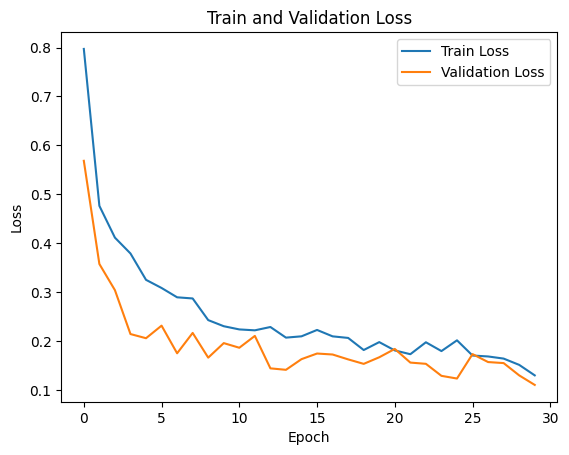

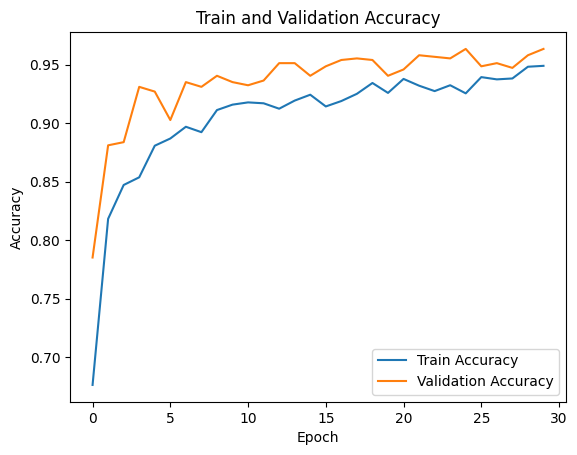

In [ ]:
# Plot train and validation loss

plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

train_acc_cpu = [acc.cpu().numpy() for acc in train_acc_history]
val_acc_cpu = [acc.cpu().numpy() for acc in val_acc_history]

# Plot train and validation accuracy
plt.plot(train_acc_cpu, label='Train Accuracy')
plt.plot(val_acc_cpu, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
!pip install torchsummary


In [ ]:
import torchsummary

# Generate model summary
torchsummary.summary(model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,